In [ ]:
"""
===-*- Noise Plot Tool -*-===
=====-*- General -*-=====
Copyright (c) makkiblog.com
MIT License 
coding: utf-8

===-*- VERSION -*-===
v0.0 Initial Release
vvvCODEvvv
"""

#Setup
import numpy as np
import scipy.fftpack
from pylab import *
from scipy import signal
from scipy import interpolate
from scipy import integrate
from scipy import stats
import scipy.optimize as opt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import os
import sys
import configparser
import codecs
import json
import csv
import wave
from numpy import savetxt
import pylab

#mpl.rcParams['agg.path.chunksize'] = 100000

In [2]:
#Setup (Visual)
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style('whitegrid')

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['figure.facecolor'] = 'white'

import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np

### SETTINGS

In [9]:
#wav data 読み込み用
#import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file + '.wav')
    print(sound_info,frame_rate)
    fig = plt.figure(num=None, figsize=(16, 8))
    plt.subplot(111)
    plt.title('spectrogram of %r' % wav_file)
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    #NFFT = int(frame_rate*0.005)
    data = plt.specgram(sound_info, Fs=frame_rate, cmap='jet')
    plt.ylim(0,1000)
    plt.clim(30, 50)
    fig.colorbar(data[3]).set_label('Intensity [dB]')
    plt.savefig(wav_file + 'specgram.png')
    
    #set axis and output to array csv
    freqdf = np.transpose([np.append(0.0,data[1])])
    timedf = [data[2]]
    #print('FREQ',freqdf)
    #print('TIME',timedf)
    #savetxt(wav_file + '_freq.csv', freqdf, delimiter=',')
    #savetxt(wav_file + '_time.csv', timedf, delimiter=',')
    arr = np.append(timedf, data[0], axis = 0)
    csvdf = np.append(freqdf, arr, axis = 1)
    print(csvdf)
    savetxt(wav_file + '.csv', csvdf, delimiter=',')

  
    
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate



### Plot Data

[-21681 -22528     84 ... -10543  -8195   -246] 48000
[[0.00000000e+00 2.66666667e-03 5.33333333e-03 ... 1.34322667e+02
  1.34325333e+02 1.34328000e+02]
 [0.00000000e+00 7.57167800e+03 7.79522825e+03 ... 1.20305322e+04
  2.35958141e+03 1.20737997e+03]
 [1.87500000e+02 2.76752303e+04 3.49605163e+04 ... 3.98847507e+03
  2.58816171e+04 7.50219813e+03]
 ...
 [2.36250000e+04 1.92810173e+03 7.18594261e+03 ... 2.45494401e+03
  3.30347823e+04 7.98699480e+03]
 [2.38125000e+04 2.14339616e+04 6.60106640e+03 ... 1.65093775e+03
  1.93376605e+04 1.12613826e+04]
 [2.40000000e+04 1.38483652e+04 4.66944450e+02 ... 1.20897797e+03
  3.06547724e+02 1.26597440e+03]]


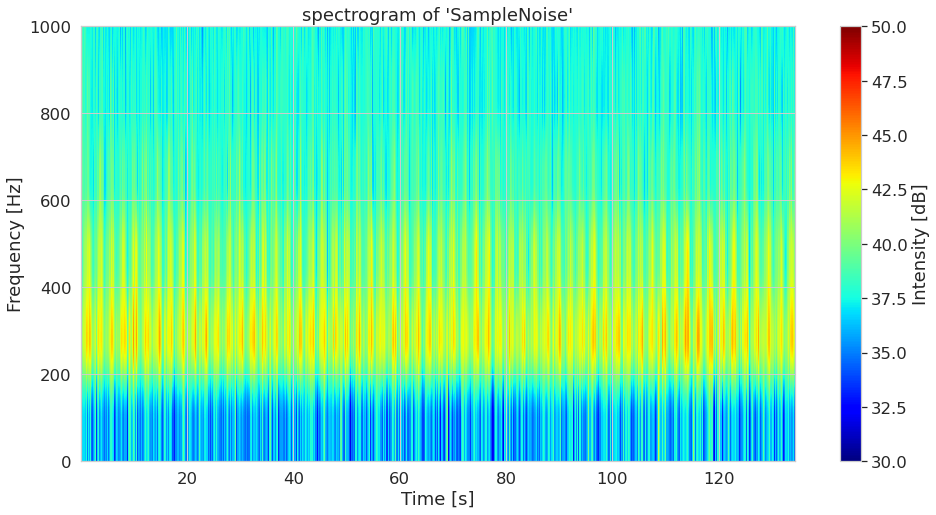

In [10]:
# wav_plot
#wavread('SampleNoise)
graph_spectrogram('SampleNoise')

